In [5]:
#Data Cleaning with EDA with Time Series Data

# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [62]:
from datetime import datetime
from pandas import read_csv

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [6]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [9]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [23]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [24]:
# combine them as strings
new_df = pd.to_datetime(df.Date.astype(str) + ' ' +df.Time.astype(str))
# add column to dataframe
df.insert(2, 'datetime', new_df)

In [30]:
df=df.drop(['Time'], axis=1)
df=df.drop(['Date'],axis=1)

In [34]:
df.rename(columns = {'datetime':'Datetime'}, inplace = True)

In [42]:
#convert all data columns to numeric types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')



In [52]:

df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Time
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,17:24:00
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,17:25:00
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,17:26:00
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,17:27:00
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,17:28:00


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [50]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [51]:
df.dtypes

Datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Date                             object
Time                             object
dtype: object

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [53]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2.049280e+06
mean,.4f,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.458447e+00
min,.4f,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.000000e+00
25%,.4f,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.000000e+00
50%,.4f,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.000000e+00
75%,.4f,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,1.700000e+01
max,.4f,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,3.100000e+01
std,nan,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.437154e+00


Those row counts look a little funky. Let's visualize our missing data.

<AxesSubplot:>

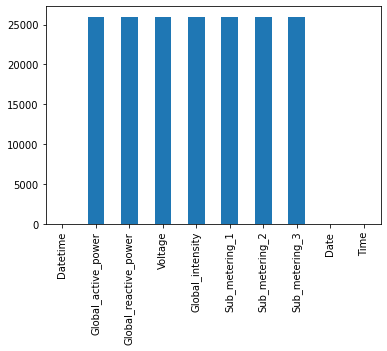

In [54]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

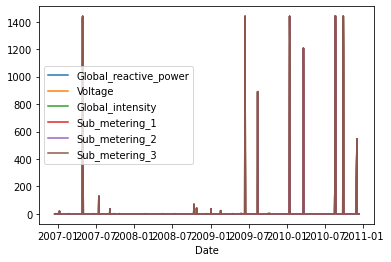

In [55]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: It follows an irregular pattern. We have most of data missing in 2007,2009 and 2010

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Since there exists a large amount of missing data, we can go for removing those particular rows. This will remove any row containing atleast one missing value. Since dataset is large enough, we will still be able to study the data trends

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [56]:
#clean up missing data here
df.dropna()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Time
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,17:24:00
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,17:25:00
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,17:26:00
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,17:27:00
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26,20:58:00
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26,20:59:00
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26,21:00:00
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26,21:01:00


In [78]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2.049280e+06
mean,.4f,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.458447e+00
min,.4f,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.000000e+00
25%,.4f,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.000000e+00
50%,.4f,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.000000e+00
75%,.4f,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,1.700000e+01
max,.4f,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,3.100000e+01
std,nan,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.437154e+00


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the raw (untransformed) data.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: We have chosen Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3'. 
We have selected them because they give us valuable info like:

global_active_power: The total active power consumed by the household (kilowatts).
sub_metering_1: Active energy for kitchen (watt-hours of active energy).
sub_metering_2: Active energy for laundry (watt-hours of active energy).
sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

The general trends of household power consumption can be studied using these variables.

In [ ]:
#build your linechart here
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'])


plt.figure(figsize=(30,30))

variables=['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for i in range(len(variables)):
 plt.subplot(len(variables), 1, i+1)
 name = variables[i]
 plt.plot(dataset[name])
 plt.title(name, y=0)
plt.show()



**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:Since we are trying to visualise a non cleaned and non transformed dataset. The results shown won't be useful to us

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [89]:
df['Date']=pd.to_datetime(df['Date'])

In [109]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df_mean = df.groupby(df.Date, sort = False).mean().reset_index()

<AxesSubplot:xlabel='Date'>

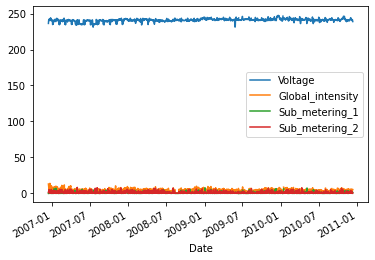

In [110]:
#build your linechart here
df_mean.plot('Date', df_mean.columns[3:-1])

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Variables Global intensity, sub metering 1 and sub metering 2 seems to move together.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above.**

In [105]:
#compute your moving average here
df_rolling_mean = df.drop('Date', axis = 1).groupby(df.Date, sort = False).rolling(30).mean().reset_index()


<AxesSubplot:xlabel='Date'>

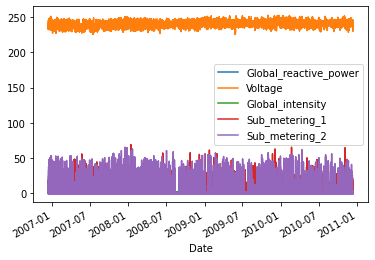

In [106]:
#build your line chart on the moving average here
df_rolling_mean.plot('Date', df_rolling_mean.columns[3:-1])

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A:Moving average provides a better visualisation of our data than monthly average. It is very well able to spot trends over the months in our data.In monthly averages we don't get very clear idea of the pattern of our variables whereas same is detected by rolling averages. Rolling averages is better for visualisation.The moving average is extremely useful for forecasting long-term trends

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

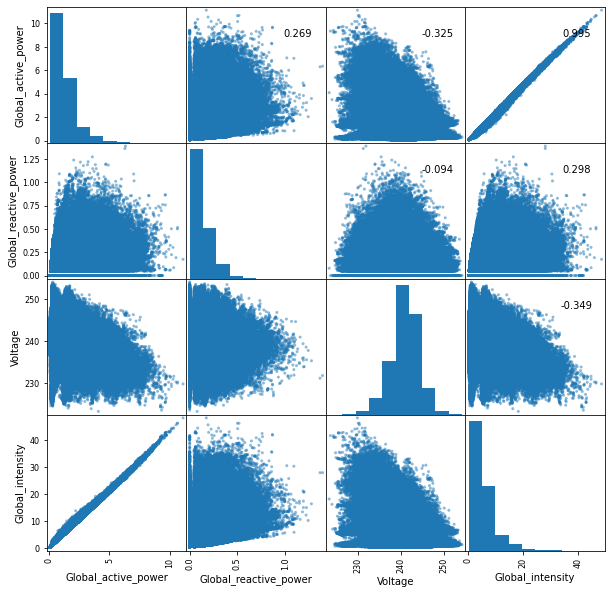

In [111]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:We observe that certain quantities are linearly related. Like Global active power and Global Intensity.Further the graph of Global reactive power and voltage shows normal or Gaussian distribution. Therefore  Global active power and Global Intensity will show high correlation in the tasks we undertake further.